In [1]:
import os
import datetime
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

import models
import report
import block_sampler
import batch_encoder
from dataset import Dataset
from report import Reporter
from trainer import Trainer
from batch_encoder import Dataset
from block_sampler import count_sectors, BlockSamplerByFile
from batch_encoder import xs_encoder_8bits_11, BatchEncoder
from filter_random import gen_rndchk_models, evaluate_rnd_model, datasets_X_random

/home/atila.alr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/atila.alr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/atila.alr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/atila.alr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dty

In [2]:
# raw_dataset_folder='/home/user/sample200'
raw_dataset_folder='../datasets/govdocs1/sample200'
random_dataset_folder='../datasets/random'
minimum=200
maximum=200
result_dir = 'results/exp36'

In [3]:
rawset = Dataset.new_from_folders(raw_dataset_folder).filter_min_max(minimum, maximum)
rndset = Dataset.new_from_folders(random_dataset_folder).filter_min_max(minimum, maximum)

In [4]:
cat_models = {}
for cat in list(rawset.categories):
    print(cat)
    model = tensorflow.keras.models.load_model('results/exp36/%s_random.h5'%cat)
    cat_models[cat] = model

log
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
rtf
xls
txt
pps
html
dwf
png
ps
pptx
jpg
unk
csv
sql
hlp
ppt
gif
eps
f
kmz
pdf
xml
dbase3
doc
kml
text
gz
wp
java
swf


In [5]:
data = pd.read_csv('results/exp36/experiments.tsv', sep='\t')
data[:2]

,category,Epochs,Time,val_binary_accuracy,val_categorical_accuracy
0,unk,19,3m48s,0.982375,0.982375
1,jpg,11,2m12s,0.531750,0.531750


In [6]:
data = data.sort_values('val_categorical_accuracy')

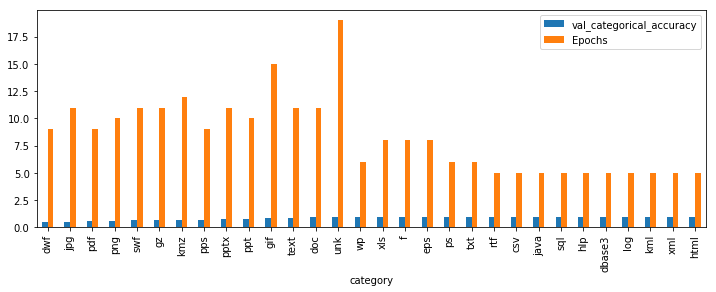

In [7]:
data.plot.bar('category', ['val_categorical_accuracy','Epochs'], figsize=(12,4))
plt.show()

In [8]:
data

,category,Epochs,Time,val_binary_accuracy,val_categorical_accuracy
17,dwf,9,1m50s,0.506375,0.506375
1,jpg,11,2m12s,0.531750,0.531750
10,pdf,9,1m49s,0.590875,0.590875
21,png,10,2m03s,0.613125,0.613125
28,swf,11,2m20s,0.644000,0.644000
16,gz,11,2m14s,0.655500,0.655500
5,kmz,12,2m22s,0.669375,0.669375
25,pps,9,2m15s,0.715500,0.715500
4,pptx,11,2m22s,0.754000,0.754000
6,ppt,10,1m59s,0.813750,0.813750


In [10]:
for cat, tset, dset in datasets_X_random(raw_dset=rawset.by_category()['dwf'], rnd_dset=rndset):
    print(cat)

dwf


In [11]:
len(tset.filenames)

200

In [12]:
model = models.C64_16_2pr_C32_4_2pr_C64_32_2pr_F_D(2, 8, 'softmax', 'categorical_crossentropy')

In [18]:
result = Trainer(model,patience=30).train(tset, dset)

In [19]:
result.history.history['val_categorical_accuracy']

[0.537,
 0.547125,
 0.542125,
 0.537125,
 0.547625,
 0.566125,
 0.532125,
 0.528375,
 0.5455,
 0.531875,
 0.53875,
 0.532,
 0.526875,
 0.53875,
 0.52575,
 0.533125,
 0.52475,
 0.526,
 0.5285,
 0.528,
 0.52175,
 0.5405,
 0.53875,
 0.524625,
 0.53225,
 0.524125,
 0.523,
 0.541125,
 0.52275,
 0.53175,
 0.52125,
 0.520875,
 0.52225,
 0.520625,
 0.526,
 0.5255]

In [20]:
import matplotlib.pyplot as plt

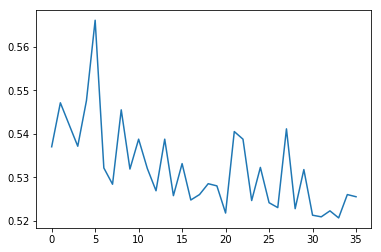

In [21]:
plt.plot(result.history.history['val_categorical_accuracy'])

In [22]:
plt.savefig('/tmp/1.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
import block_sampler

In [8]:
# raw_dataset_folder='/home/user/sample200'
raw_dataset_folder='../datasets/govdocs1/sample200'
random_dataset_folder='../datasets/random'
minimum=200
maximum=200
result_dir = 'results/exp39'

In [11]:
rawset = block_sampler.Dataset.new_from_folders(raw_dataset_folder).filter_min_max(minimum, maximum)
rawset = rawset.filter(lambda x: rawset.category_from(x) not in ['text', 'unk'])
rawset.rebuild_categories()

In [12]:
bsc = block_sampler.BlockSamplerByCategory(rawset)       

In [26]:
x = iter(bsc)
category_prob = bsc.category_prob
category_prob['ppt'] = 200
bsc.category_prob = category_prob


In [27]:
for n in range(10):
    y = next(x)
    print(y.category)

csv
ppt
ppt
rtf
ppt
ppt
ppt
ppt
ppt
ppt
